# Price Analysis On Geysers

## Problem Statement


* To conclude which geyser is suitable according to our budget and need of features 

 1. **requests** - This is used to extract the data from the given URL
 2. **BeautifulSoup** - Format and Scrap the data from the text data

**Steps**

1. Identify URL
2. Inspect HTML code
3. Find the HTML tag for the element that you want to extract.
4. Write some code to scrap this data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

## Identify url

In [14]:
url = 'https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=1'

In [15]:
page = requests.get(url)
page

<Response [200]>

In [16]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [17]:
soup = BeautifulSoup(page.text)

### url = https://www.flipkart.com/search?q=geysers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity&page=1

* Brand,Color - div class = _4rR01T
* Litres,Geyser type - li class = rgWa7D
* Price - div class = _30jeq3 _1_WHN1
* Original price - div class = _3I9_wc _27UcVY
* Discount - div class = _3Ay6Sb
* Customer rating - span class = _2_R_DZ
* Star rating - div class = _3LWZlK

## find_all()

In [18]:
a = soup.find_all('div',class_ = "_4rR01T")
for i in a:
    print(i.text)

BAJAJ 25 L Storage Water Geyser Suitable for large wall spaces (Popular Plus 25 L, White)
BAJAJ 10 L Storage Water Geyser Suitable for large wall spaces (Popular Plus 10 L, White)
BAJAJ 15 L Storage Water Geyser Suitable for large wall spaces (Popular Plus 15 L, White)
Hindware 3 L Instant Water Geyser (Immedio, White & Blue)
Crompton 5 L Instant Water Geyser (AIWH-5LJUNO3KW5Y (Juno 5L), White)
Orient Electric 25 L Storage Water Geyser (Cronos Pro, White)
Crompton 10 L Storage Water Geyser (CROMPTON 10 L Storage Water Geyser, White)
Crompton 3 L Instant Water Geyser (AIWH-3LJUNO3KW5Y, White)
BAJAJ 5 L Instant Water Geyser (Bajaj Skive 5L 3KW Instant Water Heater, White)
CSI INTERNATIONAL 1 L Instant Water Geyser (CSI INTERNATIONAL 1 L Instant Water Geyser, Red)
HAVELLS 25 L Storage Water Geyser (HAVELLS 25 L Storage Water Geyser, White & Blue)
Crompton 15 L Storage Water Geyser (Crompton 15 L ARNO NEO ASWH-3015,, White)
Crompton 25 L Storage Water Geyser (Arno Neo, White)
Polycab 5 L I

In [19]:
len(a)

24

## code scrapping from website

In [20]:
brand =[]
model =[]
litres = []
price = []
original_price =[]
customer_rating =[]
discount = []
color=[]
star =[]



for i in range(1,49):
    print("https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page="+str(i))
    urls = "https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page="


    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    
    #brand
    a = soup.find_all('div',class_="_4rR01T")
    for i in a:
        brand.append(i.text.split(' ')[0])


    #model
    b = soup.find_all('li',class_="rgWa7D")
    for i in b:
        c= re.findall("(\w+)\sGeyser",i.text)
        if len(c)>0:
            model.append(c[0])
                   
            
    #liters
    e = soup.find_all('li',class_="rgWa7D")
    for i in e:
        d = re.findall("(\d+)\sL",i.text)
        if len(d)>0:
            litres.append(d[0])


    #price
    g = soup.find_all("div",class_="_30jeq3 _1_WHN1")
    for i in g:
        price.append(i.text)


    #original_price
    h = soup.find_all("div",class_="_3I9_wc _27UcVY")
    for i in h:
        original_price.append(i.text)
        
        
    #customer_rating
    l = soup.find_all("span",class_='_2_R_DZ')
    for i in l:
        customer_rating.append(i.text.split()[0])
        

    #discount
    k = soup.find_all("div",class_="_3Ay6Sb")
    d=[]
    for i in k:
        d.append(i.text)
    discount=discount+d[:24]


    #color
    a=soup.find_all('div',class_="_4rR01T")
    for i in a:
        b1=i.text.split("(")[1].split(",")[-1].split(")")[0].strip()
        if b1 in ["White","Blue","orange","Red","White & Blue","Gray","White & Mustard","Cobalt Blue","Ivory","Black","white/blue","grey","orange and white","Royal Green"]:
            color.append(b1)
        else:
            color.append("multi-color")
            
    #star
    n = soup.find_all("div",class_="_3LWZlK")
    s =[]
    for i in n:
        s.append(i.text)
    star =star+ s[:24]

https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=1
https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=2
https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=3
https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=4
https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=5
https://www.flipkart.com/search?q=geyser&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&sort=popularity&page=6
https://www.flipkart.com/search?q=

In [21]:
print(len(brand))
print(len(model))
print(len(litres))
print(len(original_price))
print(len(discount))
print(len(price))
print(len(color))
print(len(star))
print(len(customer_rating))

1128
1128
1128
1128
1128
1128
1128
1128
1128


## create a Dataframe and save it in csv/excel file

In [22]:
file = pd.DataFrame({"Brand":brand,
              "Model_Type":model,
              "Liters":litres,
             "Original_Price":original_price,
             "Discount":discount,
             "Price":price,
            "Color":color,
            "Star_rating":star,
              "No.of_ratings":customer_rating
             })

In [23]:
file

,Brand,Model_Type,Liters,Original_Price,Discount,Price,Color,Star_rating,No.of_ratings
0,BAJAJ,Storage,25,"₹9,280",33% off,"₹6,199",White,4.2,"39,598"
1,BAJAJ,Storage,10,"₹9,650",45% off,"₹5,299",White,4.2,"39,598"
2,BAJAJ,Storage,15,"₹8,945",35% off,"₹5,799",White,4.2,"39,598"
3,Hindware,Instant,3,"₹3,850",40% off,"₹2,299",White & Blue,4.1,"77,917"
4,Crompton,Instant,5,"₹7,299",52% off,"₹3,498",multi-color,4.1,"27,585"
...,...,...,...,...,...,...,...,...,...
1123,Hindware,Instant,5,"₹7,990",62% off,"₹2,999",multi-color,4.1,"77,917"
1124,Kenstar,Storage,25,"₹16,990",62% off,"₹6,299",White,4,"1,078"
1125,HAVELLS,Storage,15,"₹16,290",52% off,"₹7,698",White & Blue,4.2,"12,132"
1126,Thomson,Instant,5,"₹4,799",47% off,"₹2,499",White,3.9,"2,642"


In [24]:
file.to_csv('Geyser_final.csv',index = False)

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SOWJANYA\mam files\Geysers_final.csv")


In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\SOWJANYA\\mam files'

In [6]:
df

,Unnamed: 0,Brand,Model Type,Liters,Original_Price,Discount,Price,Color,Star Rating,No.of ratings
0,0,Orient,Instant,5,"₹7,990",56% off,"₹3,499",White,4.1,"13,262"
1,1,HAVELLS,Storage,15,"₹16,290",52% off,"₹7,698",White & Blue,4.2,"12,080"
2,2,Crompton,Instant,3,"₹4,100",37% off,"₹2,549",White,4.2,"10,205"
3,3,ACTIVA,Instant,3,"₹3,790",51% off,"₹1,823",multi-color,4.2,"3,281"
4,4,Hindware,Instant,5,"₹6,990",52% off,"₹3,299",multi-color,4.1,"77,817"
...,...,...,...,...,...,...,...,...,...,...
1147,1147,BAJAJ,Storage,15,"₹12,750",53% off,"₹5,899",White,4.0,"6,059"
1148,1148,MinMAX,Storage,25,"₹9,999",61% off,"₹3,824",Gray,4.1,325
1149,1149,Crompton,Storage,25,"₹10,500",41% off,"₹6,099",multi-color,4.0,"2,060"
1150,1150,Kenstar,Instant,3,"₹5,990",61% off,"₹2,299",White,4.1,"2,432"


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df

,Brand,Model Type,Liters,Original_Price,Discount,Price,Color,Star Rating,No.of ratings
0,Orient,Instant,5,"₹7,990",56% off,"₹3,499",White,4.1,"13,262"
1,HAVELLS,Storage,15,"₹16,290",52% off,"₹7,698",White & Blue,4.2,"12,080"
2,Crompton,Instant,3,"₹4,100",37% off,"₹2,549",White,4.2,"10,205"
3,ACTIVA,Instant,3,"₹3,790",51% off,"₹1,823",multi-color,4.2,"3,281"
4,Hindware,Instant,5,"₹6,990",52% off,"₹3,299",multi-color,4.1,"77,817"
...,...,...,...,...,...,...,...,...,...
1147,BAJAJ,Storage,15,"₹12,750",53% off,"₹5,899",White,4.0,"6,059"
1148,MinMAX,Storage,25,"₹9,999",61% off,"₹3,824",Gray,4.1,325
1149,Crompton,Storage,25,"₹10,500",41% off,"₹6,099",multi-color,4.0,"2,060"
1150,Kenstar,Instant,3,"₹5,990",61% off,"₹2,299",White,4.1,"2,432"


In [9]:
df = df.rename(columns = {'Model Type':'Model_Type', 'Star Rating':'Star_Rating','No.of ratings':'No.of_ratings','Liters':'Litres'})
df

,Brand,Model_Type,Litres,Original_Price,Discount,Price,Color,Star_Rating,No.of_ratings
0,Orient,Instant,5,"₹7,990",56% off,"₹3,499",White,4.1,"13,262"
1,HAVELLS,Storage,15,"₹16,290",52% off,"₹7,698",White & Blue,4.2,"12,080"
2,Crompton,Instant,3,"₹4,100",37% off,"₹2,549",White,4.2,"10,205"
3,ACTIVA,Instant,3,"₹3,790",51% off,"₹1,823",multi-color,4.2,"3,281"
4,Hindware,Instant,5,"₹6,990",52% off,"₹3,299",multi-color,4.1,"77,817"
...,...,...,...,...,...,...,...,...,...
1147,BAJAJ,Storage,15,"₹12,750",53% off,"₹5,899",White,4.0,"6,059"
1148,MinMAX,Storage,25,"₹9,999",61% off,"₹3,824",Gray,4.1,325
1149,Crompton,Storage,25,"₹10,500",41% off,"₹6,099",multi-color,4.0,"2,060"
1150,Kenstar,Instant,3,"₹5,990",61% off,"₹2,299",White,4.1,"2,432"


In [10]:
df.shape

(1152, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           1152 non-null   object 
 1   Model_Type      1152 non-null   object 
 2   Litres          1152 non-null   int64  
 3   Original_Price  1152 non-null   object 
 4   Discount        1152 non-null   object 
 5   Price           1152 non-null   object 
 6   Color           1152 non-null   object 
 7   Star_Rating     1152 non-null   float64
 8   No.of_ratings   1152 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.1+ KB


In [12]:
df.describe()

,Litres,Star_Rating
count,1152.000000,1152.000000
mean,11.139757,4.091667
std,8.650794,0.111541
min,1.000000,3.700000
25%,3.000000,4.100000
50%,10.000000,4.100000
75%,15.000000,4.200000
max,25.000000,4.200000


In [13]:
df.isna().sum()

Brand             0
Model_Type        0
Litres            0
Original_Price    0
Discount          0
Price             0
Color             0
Star_Rating       0
No.of_ratings     0
dtype: int64

In [14]:
df['Brand'].value_counts()

Brand
Crompton     161
V-Guard      144
HAVELLS      144
Hindware     118
Kenstar       65
Candes        62
Longway       62
Thomson       48
MinMAX        48
BAJAJ         48
CSI           48
Sansui        48
Universal     48
Orient        43
Racold        31
RENUMAX       17
ACTIVA        17
Name: count, dtype: int64

In [15]:
df['Brand'].unique()

array(['Orient', 'HAVELLS', 'Crompton', 'ACTIVA', 'Hindware', 'Universal',
       'V-Guard', 'Kenstar', 'CSI', 'Sansui', 'Thomson', 'RENUMAX',
       'BAJAJ', 'MinMAX', 'Longway', 'Racold', 'Candes'], dtype=object)

In [16]:
df['Original_Price']=df['Original_Price'].str.replace('₹','')
df['Original_Price']=df['Original_Price'].str.replace(',','')
df['Price']=df['Price'].str.replace('₹','')
df['Price']=df['Price'].str.replace(',','')
df['Discount']=df['Discount'].str.replace('%','')
df['Discount']=df['Discount'].str.replace('off','')
df['No.of_ratings']=df['No.of_ratings'].str.replace(',','')

In [17]:
df

,Brand,Model_Type,Litres,Original_Price,Discount,Price,Color,Star_Rating,No.of_ratings
0,Orient,Instant,5,7990,56,3499,White,4.1,13262
1,HAVELLS,Storage,15,16290,52,7698,White & Blue,4.2,12080
2,Crompton,Instant,3,4100,37,2549,White,4.2,10205
3,ACTIVA,Instant,3,3790,51,1823,multi-color,4.2,3281
4,Hindware,Instant,5,6990,52,3299,multi-color,4.1,77817
...,...,...,...,...,...,...,...,...,...
1147,BAJAJ,Storage,15,12750,53,5899,White,4.0,6059
1148,MinMAX,Storage,25,9999,61,3824,Gray,4.1,325
1149,Crompton,Storage,25,10500,41,6099,multi-color,4.0,2060
1150,Kenstar,Instant,3,5990,61,2299,White,4.1,2432


In [18]:
df.to_csv('Final_Geyer.csv',index = False)

# Type Casting

In [19]:
df['Discount']=df['Discount'].astype('int')
df['Original_Price']=df['Original_Price'].astype('int')
df['Price']=df['Price'].astype('int')
df['No.of_ratings'] =df['No.of_ratings'].astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           1152 non-null   object 
 1   Model_Type      1152 non-null   object 
 2   Litres          1152 non-null   int64  
 3   Original_Price  1152 non-null   int32  
 4   Discount        1152 non-null   int32  
 5   Price           1152 non-null   int32  
 6   Color           1152 non-null   object 
 7   Star_Rating     1152 non-null   float64
 8   No.of_ratings   1152 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(3)
memory usage: 63.1+ KB


In [21]:
df.describe()   

,Litres,Original_Price,Discount,Price,Star_Rating,No.of_ratings
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,11.139757,8061.379340,47.657986,4178.043403,4.091667,14500.114583
std,8.650794,3739.820403,10.112368,2012.526738,0.111541,20138.429543
min,1.000000,1999.000000,27.000000,849.000000,3.700000,123.000000
25%,3.000000,4849.000000,41.000000,2720.000000,4.100000,2605.000000
50%,10.000000,7629.000000,50.000000,3599.000000,4.100000,10205.000000
75%,15.000000,10500.000000,53.000000,6099.000000,4.200000,16964.000000
max,25.000000,16290.000000,71.000000,7698.000000,4.200000,77817.000000


In [22]:
df

,Brand,Model_Type,Litres,Original_Price,Discount,Price,Color,Star_Rating,No.of_ratings
0,Orient,Instant,5,7990,56,3499,White,4.1,13262
1,HAVELLS,Storage,15,16290,52,7698,White & Blue,4.2,12080
2,Crompton,Instant,3,4100,37,2549,White,4.2,10205
3,ACTIVA,Instant,3,3790,51,1823,multi-color,4.2,3281
4,Hindware,Instant,5,6990,52,3299,multi-color,4.1,77817
...,...,...,...,...,...,...,...,...,...
1147,BAJAJ,Storage,15,12750,53,5899,White,4.0,6059
1148,MinMAX,Storage,25,9999,61,3824,Gray,4.1,325
1149,Crompton,Storage,25,10500,41,6099,multi-color,4.0,2060
1150,Kenstar,Instant,3,5990,61,2299,White,4.1,2432


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Univariate Analysis

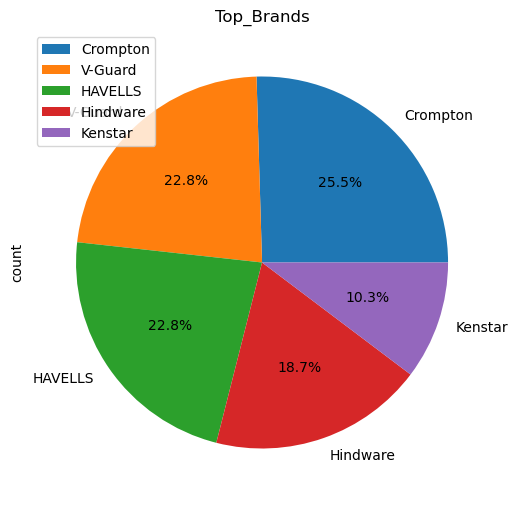

In [25]:
df['Brand'].value_counts().head(5).plot(kind='pie',autopct='%1.1f%%',legend=True,title='Top_Brands',figsize=(6,10))
plt.show()

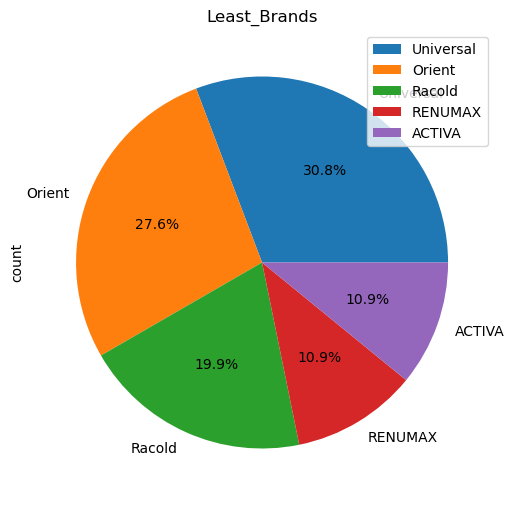

In [26]:
df['Brand'].value_counts().tail(5).plot(kind='pie',autopct='%1.1f%%',legend=True,title='Least_Brands',figsize=(6,10))
plt.show()

In [27]:
df.groupby('Brand')['Price'].min()

Brand
ACTIVA       1823
BAJAJ        5899
CSI          1099
Candes       3049
Crompton     2549
HAVELLS      6499
Hindware     2299
Kenstar      2299
Longway      3599
MinMAX       3824
Orient       3499
RENUMAX      1047
Racold       2949
Sansui       2999
Thomson      2699
Universal     849
V-Guard      2799
Name: Price, dtype: int32

In [80]:
df[df['Brand']=='HAVELLS'].min()

Brand                  HAVELLS
Model_Type             Storage
Litres                      10
Original_Price           10810
Discount                    35
Price                     6499
Color             White & Blue
Star_Rating                4.0
No.of_ratings            12080
dtype: object

<Axes: title={'center': 'Frequency of Brands'}, xlabel='count', ylabel='Brand'>

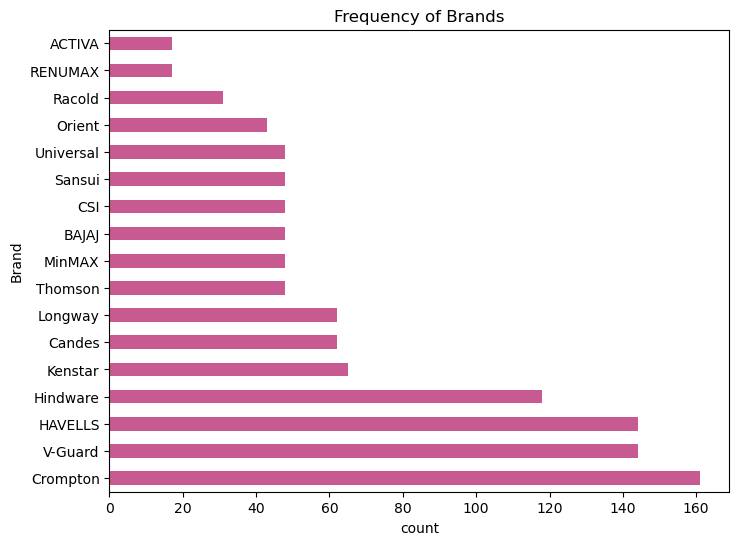

In [28]:
df['Brand'].value_counts().plot(kind='barh',
                             title = 'Frequency of Brands',
                               xlabel = 'count',
                               figsize=(8,6),
                               color = '#c75a90')

In [29]:
plt.style.use('classic')

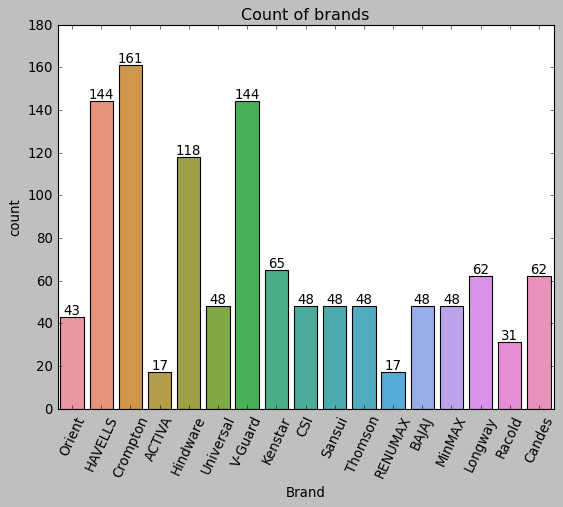

In [30]:
ax = sns.countplot(data = df,x= 'Brand')
plt.xticks(rotation=65)
plt.title('Count of brands')
#plt.show()
for i in ax.containers:
    ax.bar_label(i,)

In [31]:
df.columns

Index(['Brand', 'Model_Type', 'Litres', 'Original_Price', 'Discount', 'Price',
       'Color', 'Star_Rating', 'No.of_ratings'],
      dtype='object')

<Axes: >

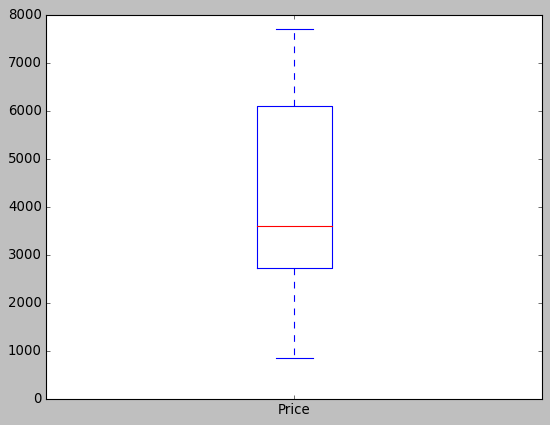

In [32]:
df['Price'].plot(kind='box')

<Axes: ylabel='Density'>

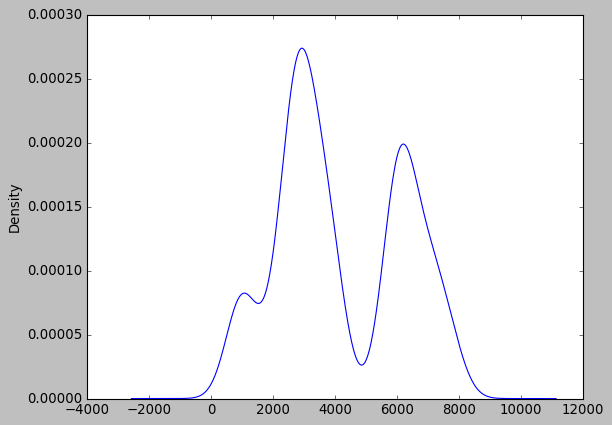

In [33]:
df['Price'].plot(kind='kde')

In [34]:
import warnings
warnings.filterwarnings('ignore')

<Axes: ylabel='Frequency'>

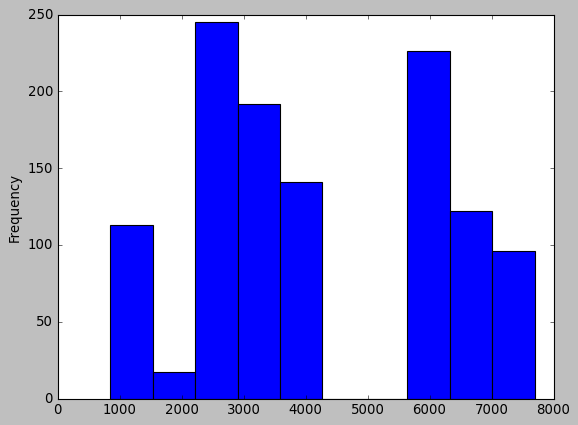

In [35]:
df['Price'].plot(kind = 'hist')

Text(0.5, 1.0, 'Distribution of Price')

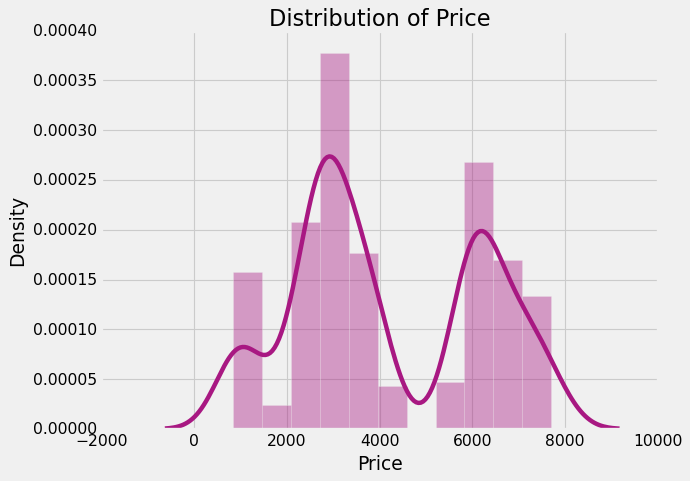

In [36]:
plt.style.use('fivethirtyeight')
sns.distplot(df['Price'],color = '#a81882')
plt.title('Distribution of Price')

In [37]:
df[df['Brand'] == 'Crompton'].min()

Brand             Crompton
Model_Type         Instant
Litres                   3
Original_Price        4100
Discount                37
Price                 2549
Color                White
Star_Rating            4.0
No.of_ratings          123
dtype: object

In [38]:
df[df['Model_Type']=='Instant'].max()

Brand                 V-Guard
Model_Type            Instant
Litres                      5
Original_Price           7990
Discount                   71
Price                    3499
Color             multi-color
Star_Rating               4.2
No.of_ratings           77817
dtype: object

In [39]:
df[df['Model_Type']=='Storage'].max()

Brand                 V-Guard
Model_Type            Storage
Litres                     25
Original_Price          16290
Discount                   61
Price                    7698
Color             multi-color
Star_Rating               4.2
No.of_ratings           77817
dtype: object

In [40]:
df['Price'].mean()

4178.043402777777

In [41]:
df['Price'].median()

3599.0

## Bivariate Analysis

In [42]:
plt.style.use('default')

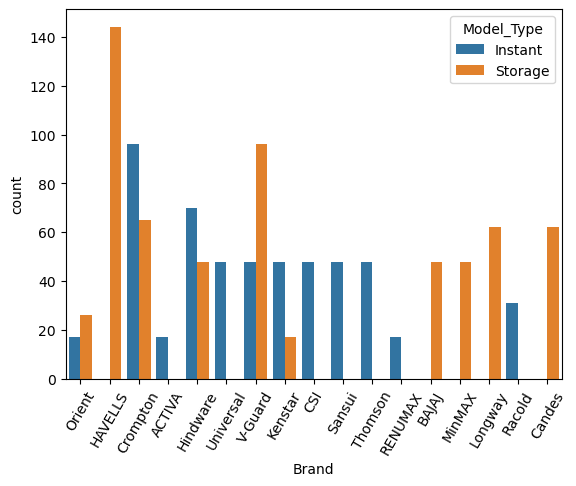

In [43]:
sns.countplot(data=df,x='Brand',hue='Model_Type')
plt.xticks(rotation=60)
plt.show()

In [44]:
df['Litres'].unique()

array([ 5, 15,  3,  1, 25, 10], dtype=int64)

<Axes: title={'center': 'Min Litres based on brand'}, xlabel='Brand'>

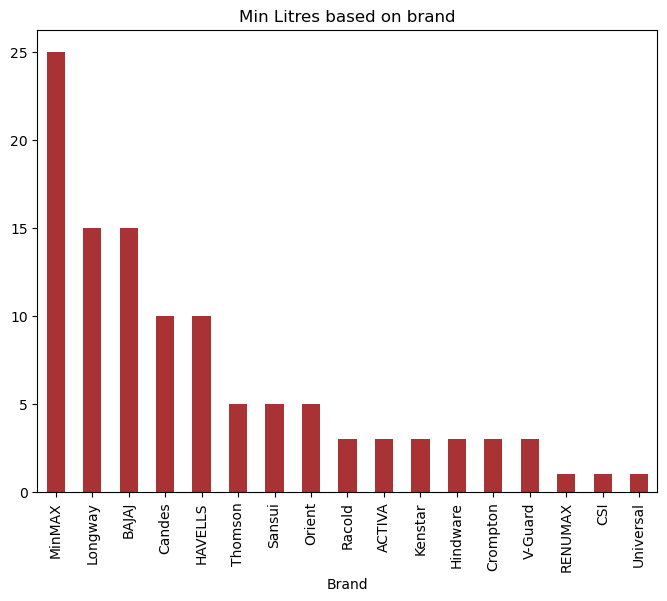

In [61]:
df.groupby('Brand')['Litres'].min().sort_values(ascending = False).plot(kind='bar',
                                                                        color='#a83234',
                                                                        figsize=(8,6),
                                                                       title = 'Min Litres based on brand')

In [ ]:
df.groupby('Price')['Litres'].max().sort_values(ascending = False).plot(kind='bar',color='#5cdb7e',figsize=(8,6))

In [46]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 5000x2500 with 0 Axes>

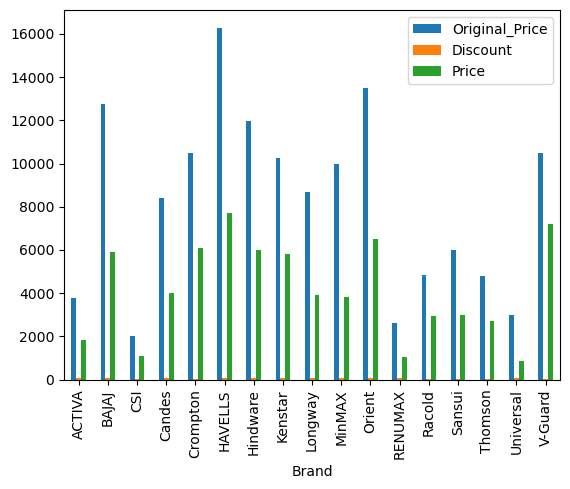

In [47]:
plt.figure(figsize=(50,25))
df.groupby("Brand")[['Original_Price','Discount','Price']].max().plot(kind='bar')
plt.show()

In [48]:
df['Price'].unique()

array([3499, 7698, 2549, 1823, 3299,  849, 6199, 5799, 2720, 1099, 2799,
       5995, 7199, 2999, 6499, 5699, 2699, 1047, 5899, 3824, 6099, 2299,
       6999, 6490, 3899, 2949, 3049, 3999, 3599])

<Figure size 5000x2500 with 0 Axes>

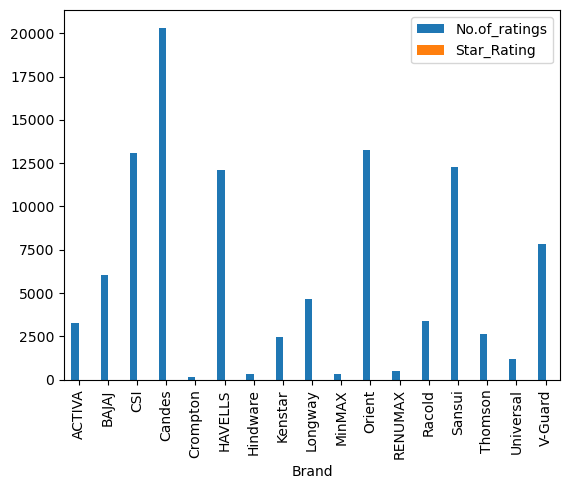

In [49]:
plt.figure(figsize=(50,25))
df.groupby('Brand')[['No.of_ratings','Star_Rating']].min().plot(kind='bar')
plt.show()

In [50]:
df['Color'].value_counts()

Color
White              562
multi-color        274
Gray               110
Ivory               62
White & Blue        48
Cobalt Blue         48
White & Mustard     48
Name: count, dtype: int64

<Axes: xlabel='Brand'>

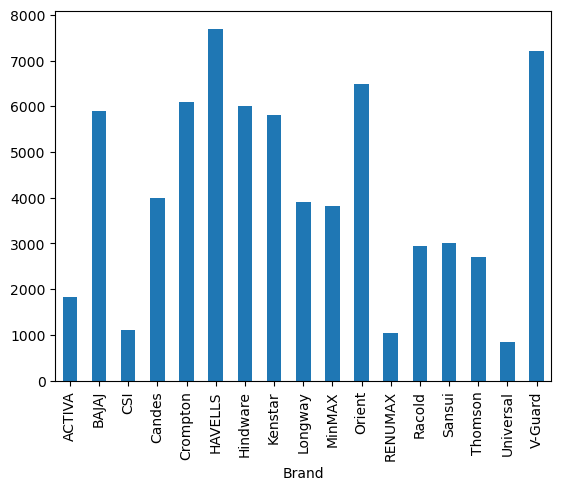

In [51]:
df.groupby('Brand')['Price'].max().plot(kind = 'bar')

In [52]:
df.groupby('Brand')['Star_Rating'].sum()

Brand
ACTIVA        71.4
BAJAJ        195.1
CSI          199.1
Candes       251.6
Crompton     657.1
HAVELLS      596.8
Hindware     491.2
Kenstar      262.8
Longway      256.8
MinMAX       196.8
Orient       176.3
RENUMAX       68.0
Racold       127.6
Sansui       196.3
Thomson      195.8
Universal    193.8
V-Guard      577.1
Name: Star_Rating, dtype: float64

<Axes: xlabel='Brand,Color'>

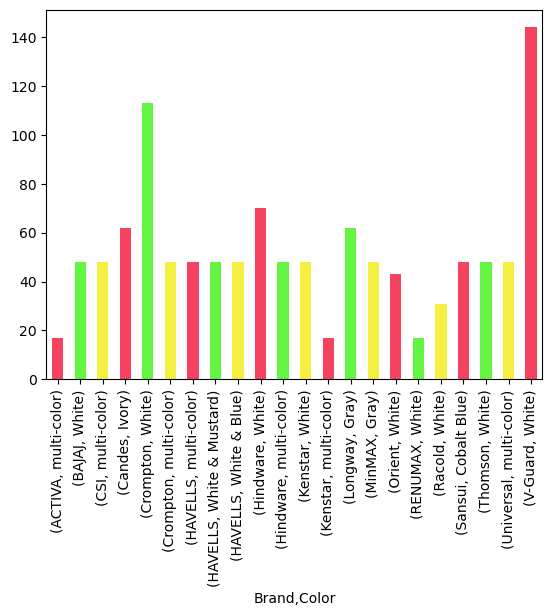

In [53]:
df.groupby('Brand')['Color'].value_counts().plot(kind='bar',color =['#f54260','#63f542','#f5ef42'])

In [54]:
plt.style.use('fivethirtyeight')

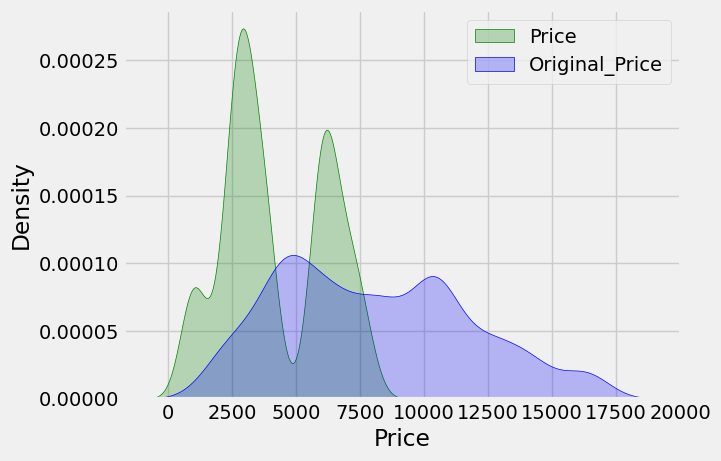

In [55]:
sns.kdeplot(df['Price'],shade=True,color='g',label='Price')
sns.kdeplot(df['Original_Price'],shade=True,color='b',label='Original_Price')
plt.legend()
plt.show()

In [41]:
df['Star_Rating'].unique()

array([4.1, 4.2, 3.7, 3.9, 4. ])

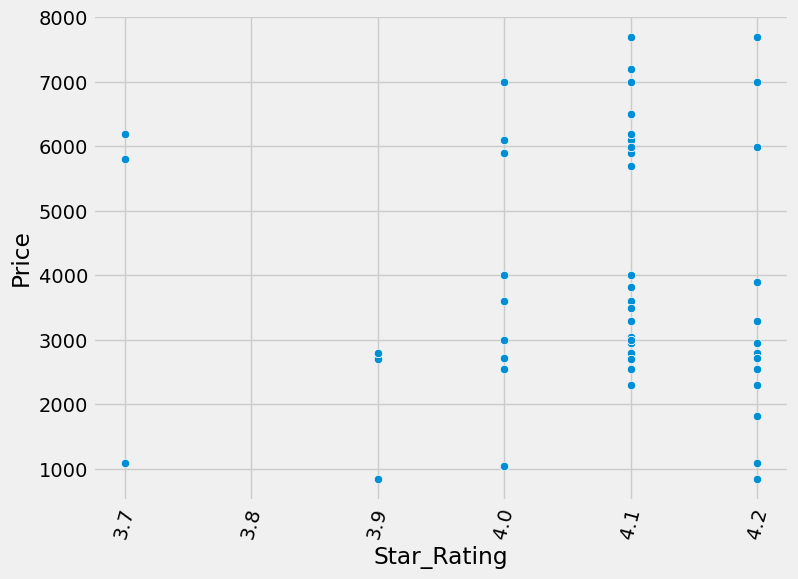

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Star_Rating'],y=df['Price'])
plt.xticks(rotation=75)
plt.show()

## Multivariate Analysis

In [59]:
df.corr(numeric_only=True)

,Litres,Original_Price,Discount,Price,Star_Rating,No.of_ratings
Litres,1.000000,0.694205,-0.010567,0.649697,-0.102788,0.168132
Original_Price,0.694205,1.000000,-0.001927,0.918179,0.065473,0.218363
Discount,-0.010567,-0.001927,1.000000,-0.363238,0.212682,-0.011253
Price,0.649697,0.918179,-0.363238,1.000000,-0.042090,0.207481
Star_Rating,-0.102788,0.065473,0.212682,-0.042090,1.000000,0.172211
No.of_ratings,0.168132,0.218363,-0.011253,0.207481,0.172211,1.000000


<Axes: >

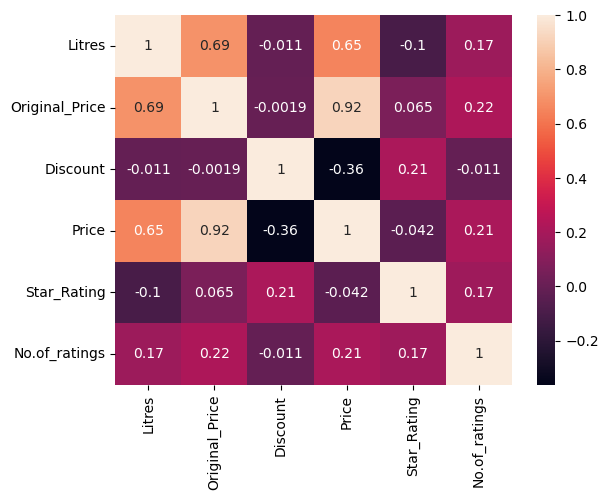

In [60]:
sns.heatmap(df.corr(numeric_only=True),annot=True)